In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('breast-cancer.csv')

In [9]:
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [15]:
df.drop(['id'], axis = 1)
df.diagnosis = [1 if each == "M" else 0 for each in df.diagnosis]

In [17]:
y = df.diagnosis.values
x_data = df.drop(['diagnosis'], axis = 1)


In [18]:
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data)).values

/Users/vaps/opt/anaconda3/envs/ia/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/vaps/opt/anaconda3/envs/ia/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.1, random_state = 42)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (31, 512)
x test:  (31, 57)
y train:  (512,)
y test:  (57,)


In [20]:
def initialize_weights_and_bias(dimension):
	w = np.full((dimension, 1), 0.01)
	b = 0.0
	return w, b

In [21]:
# z = np.dot(w.T, x_train)+b
def sigmoid(z):
	y_head = 1/(1 + np.exp(-z))
	return y_head


In [22]:
def forward_backward_propagation(w, b, x_train, y_train):
	z = np.dot(w.T, x_train) + b
	y_head = sigmoid(z)
	loss = - y_train * np.log(y_head) - (1 - y_train) * np.log(1 - y_head)
	# x_train.shape[1] is for scaling
	cost = (np.sum(loss)) / x_train.shape[1]	

	# backward propagation
	derivative_weight = (np.dot(x_train, (
		(y_head - y_train).T))) / x_train.shape[1]
	derivative_bias = np.sum(
		y_head-y_train) / x_train.shape[1]				
	gradients = {"derivative_weight": derivative_weight,
				"derivative_bias": derivative_bias}
	return cost, gradients


In [23]:
def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
	cost_list = []
	cost_list2 = []
	index = []

	# updating(learning) parameters is number_of_iterarion times
	for i in range(number_of_iterarion):
		# make forward and backward propagation and find cost and gradients
		cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
		cost_list.append(cost)

		# lets update
		w = w - learning_rate * gradients["derivative_weight"]
		b = b - learning_rate * gradients["derivative_bias"]
		if i % 10 == 0:
			cost_list2.append(cost)
			index.append(i)
			print ("Cost after iteration % i: % f" %(i, cost))

	# update(learn) parameters weights and bias
	parameters = {"weight": w, "bias": b}
	plt.plot(index, cost_list2)
	plt.xticks(index, rotation ='vertical')
	plt.xlabel("Number of Iterarion")
	plt.ylabel("Cost")
	plt.show()
	return parameters, gradients, cost_list


In [24]:
def predict(w, b, x_test):
	# x_test is a input for forward propagation
	z = sigmoid(np.dot(w.T, x_test)+b)
	Y_prediction = np.zeros((1, x_test.shape[1]))

	# if z is bigger than 0.5, our prediction is sign one (y_head = 1),
	# if z is smaller than 0.5, our prediction is sign zero (y_head = 0),
	for i in range(z.shape[1]):
		if z[0, i]<= 0.5:
			Y_prediction[0, i] = 0
		else:
			Y_prediction[0, i] = 1

	return Y_prediction


Cost after iteration  0:  0.692107
Cost after iteration  10:  0.498712
Cost after iteration  20:  0.405300
Cost after iteration  30:  0.350568
Cost after iteration  40:  0.314393
Cost after iteration  50:  0.288491
Cost after iteration  60:  0.268875
Cost after iteration  70:  0.253397
Cost after iteration  80:  0.240795
Cost after iteration  90:  0.230280


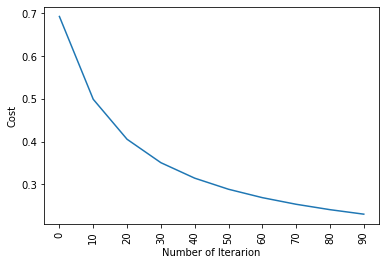

train accuracy: 94.7265625 %
test accuracy: 94.73684210526316 %


In [25]:
def logistic_regression(x_train, y_train, x_test, y_test,
						learning_rate, num_iterations):

	dimension = x_train.shape[0]
	w, b = initialize_weights_and_bias(dimension)
	
	parameters, gradients, cost_list = update(
		w, b, x_train, y_train, learning_rate, num_iterations)
	
	y_prediction_test = predict(
		parameters["weight"], parameters["bias"], x_test)
	y_prediction_train = predict(
		parameters["weight"], parameters["bias"], x_train)

	# train / test Errors
	print("train accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
	print("test accuracy: {} %".format(
		100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
	
logistic_regression(x_train, y_train, x_test,
					y_test, learning_rate = 1, num_iterations = 100)


In [26]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42, max_iter = 150)
print("test accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(
	logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))


test accuracy: 0.9824561403508771 
train accuracy: 0.970703125 


In [1]:
import re
cad = "Hoy es un dia de lluvia de las 8:00 am"

print(re.findall(r'\d+', cad))
print(re.findall(r'\d+', cad)[0])
print(re.findall(r'\d+', cad)[1])

['8', '00']
8
00
